In [74]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

def nice_imshow(in_array, title="", xlab="", ylab="", figsize=(10,10)):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    im = ax.imshow(in_array)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="7%", pad="2%")
    plt.colorbar(im, cax=cax)
    ax.set(xlabel=xlab, ylabel=ylab, title=title)
    
def compute_singular_values(in_data_matrix):
    U, S, Vt = np.linalg.svd(in_data_matrix)
    return S

def reconstruct_svd(in_data_matrix, L):
    U, S, Vt = np.linalg.svd(in_data_matrix)
    U_L = U[:, :L]
    S_L = np.diag(S[:L])
    Vt_L = Vt[:L, :]
    return np.matmul(U_L, np.matmul(S_L, Vt_L))

import numpy as np

def reconstruct_scatter(in_data_matrix, L):
    scatter_matrix = np.dot(in_data_matrix.T, in_data_matrix)

    eigenvalues, eigenvectors = np.linalg.eig(scatter_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    selected_eigenvectors = eigenvectors[:, :L]

    projected_data_matrix = np.matmul(in_data_matrix, selected_eigenvectors)

    return (np.dot(projected_data_matrix, selected_eigenvectors.T))

def compute_pca_reconstruction_loss(in_data_matrix, L):
    m_matrix = in_data_matrix
    reconstructured_matrix = reconstruct_svd(in_data_matrix, L)
    frobenius_norm = np.linalg.norm(m_matrix - reconstructured_matrix, 'fro')
    return frobenius_norm   


In [2]:
train_data = np.load('data.npz')
dm_0 = train_data["dm_0"]
dm_1 = train_data["dm_1"]

In [3]:
#nice_imshow(dm_0, title="dm_0", xlab="each column is a feature", ylab="each raw is a measurement", figsize=(7,7))
#nice_imshow(dm_1, title="dm_1", xlab="each column is a feature", ylab="each raw is a measurement", figsize=(7,7))

In [4]:
avg_0 = np.mean(dm_0, axis=0)
m_dm_0 = (dm_0 - avg_0[None,:])
#nice_imshow(m_dm_0, title="m_dm_0", xlab="each column is a feature", ylab="each raw is a measurement", figsize=(7,7))

avg_1 = np.mean(dm_1, axis=0)
m_dm_1 = (dm_1 - avg_1[None,:])
#nice_imshow(m_dm_1, title="m_dm_1", xlab="each column is a feature", ylab="each raw is a measurement", figsize=(7,7))

In [5]:
singular_values_0 = compute_singular_values(m_dm_0)
print("singular values of m_dm_0:"+str(singular_values_0))
singular_values_1 = compute_singular_values(m_dm_1)
print("singular values of m_dm_1:"+str(singular_values_1))

In [78]:
reconstructed_svd_dm_0 = reconstruct_svd(m_dm_0, 8)
reconstructed_svd_dm_1 = reconstruct_svd(m_dm_1, 8)

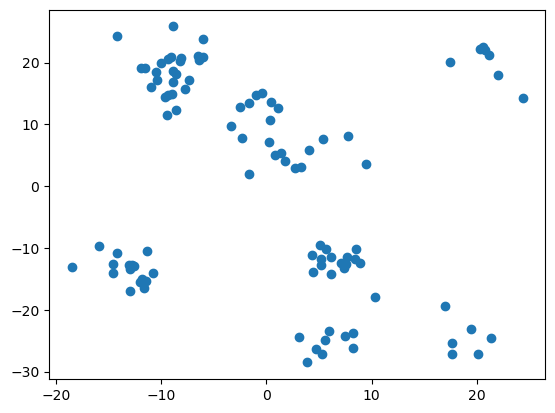

In [52]:
plt.scatter(reconstructed_svd_dm_0[:,0],reconstructed_svd_dm_0[:,1])

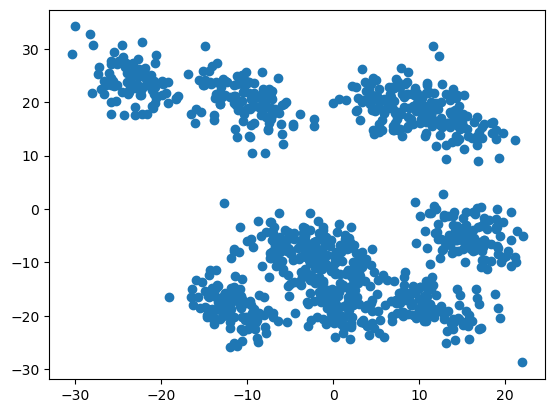

In [53]:
plt.scatter(reconstructed_svd_dm_1[:,0],reconstructed_svd_dm_1[:,1])

In [71]:
reconstructed_eig_dm_0 = reconstruct_scatter(m_dm_0, L=8)
reconstructed_eig_dm_1 = reconstruct_scatter(m_dm_1, L=8)

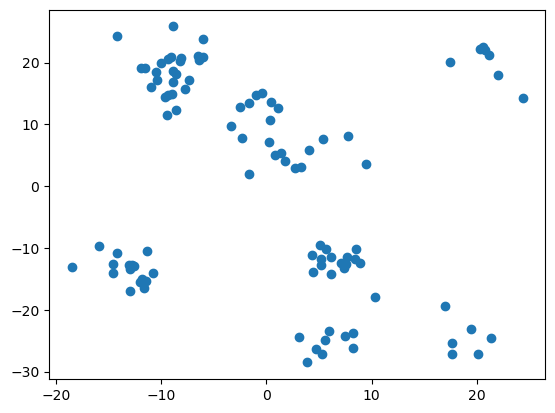

In [72]:
plt.scatter(reconstructed_eig_dm_0[:,0],reconstructed_eig_dm_0[:,1])

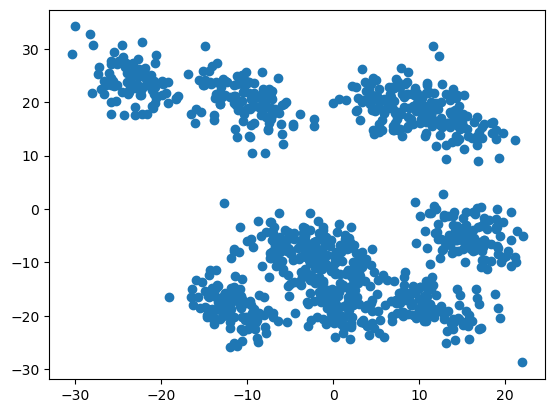

In [73]:
plt.scatter(reconstructed_eig_dm_1[:,0],reconstructed_eig_dm_1[:,1])

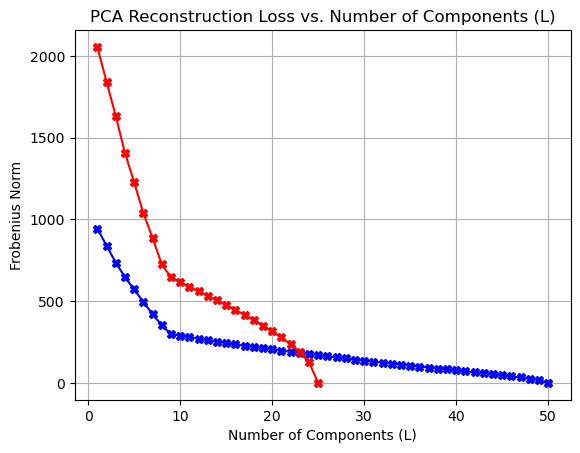

In [80]:
L_values_0 = list(range(1, 51))
frobenius_norm_values_0 = []
for L_0 in L_values_0:
    frobenius_norm_0 = compute_pca_reconstruction_loss(m_dm_0, L_0)
    frobenius_norm_values_0.append(frobenius_norm_0)
       
L_values_1 = list(range(1, 26))
frobenius_norm_values_1 = []    
for L_1 in L_values_1:
    frobenius_norm_1 = compute_pca_reconstruction_loss(m_dm_1, L_1)
    frobenius_norm_values_1.append(frobenius_norm_1)
    
plt.plot(L_values_0, frobenius_norm_values_0, marker='X', linestyle='-', color='blue')
plt.plot(L_values_1, frobenius_norm_values_1, marker='X', linestyle='-', color='red')

plt.title('PCA Reconstruction Loss vs. Number of Components (L)')
plt.xlabel('Number of Components (L)')
plt.ylabel('Frobenius Norm')
plt.grid(True)
plt.show()